#Daffa Rizki Rizaly - 2301931251

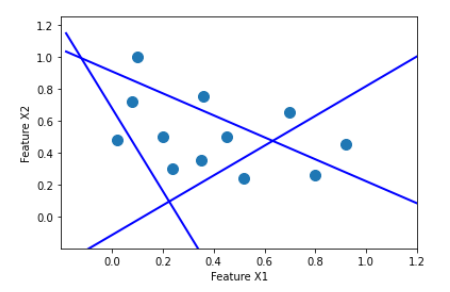

As shown above , there is 4 lines. This line represent the parameters to determine what ouput will the features result in. Therefore we can make, in our code into 4 hidden layers

In [1]:
from random import seed
from random import random
import matplotlib.pyplot as plt
import pandas as pd
from math import exp
import numpy as np

In [2]:
# Initialize a network, and randomly assign the weights
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

In [3]:
#Forward propagation

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return np.round(1.0 / (1.0 + exp(-activation)),2)

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs) #linear combination
			neuron['output'] = transfer(activation) # activation function e.g. sigmoid
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs



In [4]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])


In [5]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

In [6]:
#Apply this function to learn from data - you must provide the train variable which consist of your dataset

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      outputs = forward_propagate(network, row[:2])
      expected = row[2:3]
      sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
      backward_propagate_error(network, expected)
      update_weights(network, row, l_rate)
      # for layer in network:
        # print(layer)
    if epoch%5 == 0:
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    
    


In [7]:
seed(1)
#Untuk output -1 diubah menjadi 0 secara manual
dataset = [[0.08,0.72,1],
	[0.20,0.50,1],
	[0.24,0.30,1],
	[0.35,0.35,1],
	[0.45,0.50,1],
	[0.02,0.48,0],
	[0.10,1.00,0],
	[0.36,0.75,0],
	[0.52,0.25,0],
	[0.70, 0.65,0],
    [0.80,0.26,0],
    [0.92,0.46,0]]
n_inputs = len(dataset[0]) - 1
n_hidden =  4
n_outputs = 1
network = initialize_network(n_inputs, n_hidden, n_outputs)

#use it if you want to determine initial weights:
# network = [[{'weights': [0.5, 0.1, 1]}],
#            [{'weights': [1, -1]}]]

epoch = 5000
lr = 0.5
train_network(network, dataset, lr, epoch, n_outputs)

>epoch=0, lrate=0.500, error=4.297
>epoch=5, lrate=0.500, error=3.078
>epoch=10, lrate=0.500, error=3.117
>epoch=15, lrate=0.500, error=3.083
>epoch=20, lrate=0.500, error=3.083
>epoch=25, lrate=0.500, error=3.083
>epoch=30, lrate=0.500, error=3.073
>epoch=35, lrate=0.500, error=3.083
>epoch=40, lrate=0.500, error=3.062
>epoch=45, lrate=0.500, error=3.063
>epoch=50, lrate=0.500, error=3.028
>epoch=55, lrate=0.500, error=3.029
>epoch=60, lrate=0.500, error=3.029
>epoch=65, lrate=0.500, error=3.018
>epoch=70, lrate=0.500, error=2.994
>epoch=75, lrate=0.500, error=3.005
>epoch=80, lrate=0.500, error=2.986
>epoch=85, lrate=0.500, error=2.996
>epoch=90, lrate=0.500, error=2.955
>epoch=95, lrate=0.500, error=2.936
>epoch=100, lrate=0.500, error=2.917
>epoch=105, lrate=0.500, error=2.888
>epoch=110, lrate=0.500, error=2.892
>epoch=115, lrate=0.500, error=2.861
>epoch=120, lrate=0.500, error=2.838
>epoch=125, lrate=0.500, error=2.831
>epoch=130, lrate=0.500, error=2.824
>epoch=135, lrate=0.500

In [8]:
#Predict the outcome using forward_Propogate
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs[0]

In [9]:
actual = []
preds = []
#Looping to check if the expected and got matchs
for row in dataset:
    actual.append(row[-1])
    prediction = predict(network, row)
    preds.append(int(np.round(prediction)))
    print('Expected=%d, Got (actual)=%f, Got (prediction)=%d' % (row[-1], prediction, np.round(prediction)))

Expected=1, Got (actual)=0.910000, Got (prediction)=1
Expected=1, Got (actual)=0.970000, Got (prediction)=1
Expected=1, Got (actual)=0.910000, Got (prediction)=1
Expected=1, Got (actual)=0.980000, Got (prediction)=1
Expected=1, Got (actual)=0.950000, Got (prediction)=1
Expected=0, Got (actual)=0.090000, Got (prediction)=0
Expected=0, Got (actual)=0.010000, Got (prediction)=0
Expected=0, Got (actual)=0.050000, Got (prediction)=0
Expected=0, Got (actual)=0.040000, Got (prediction)=0
Expected=0, Got (actual)=0.000000, Got (prediction)=0
Expected=0, Got (actual)=0.000000, Got (prediction)=0
Expected=0, Got (actual)=0.000000, Got (prediction)=0


In [10]:
#Confusion Matrix
result  = pd.DataFrame((actual,preds)).T
result.columns  = ("actual", "preds")

conf_matrix  =  pd.crosstab(result.actual, result.preds)
conf_matrix

preds,0,1
actual,,
0,7,0
1,0,5


In [11]:
tn  = conf_matrix.iloc[0,0]
fp  = conf_matrix.iloc[0,1]
fn  = conf_matrix.iloc[1,0]
tp  = conf_matrix.iloc[1,1]

In [12]:
accuracy =  (tp+tn)/(tp+tn+fp+fn) * 100
recall =  tp/(tp+fn) * 100
precision  = tp/(tp+fp) * 100
f1Score = 2*(recall*precision)/(recall+precision)

print ('accuracy =  %.3f' % accuracy)
print ('recall =  %.3f'  % recall)
print ('precision =  %.3f' % precision)
print ('f1Score =  %.3f'  % f1Score)

accuracy =  100.000
recall =  100.000
precision =  100.000
f1Score =  100.000
